In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from ipywidgets import *
from manim import *
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
%matplotlib widget

np.set_printoptions(precision=3, suppress=True, linewidth=100)
def plotLayout(ax,xlim,ylim,title,xlab,ylab):
    # prepares a plot layout
    # Where:
    #- axis ax: figures axis
    #- param xlim: (xmin,xmax)x range of plot
    #- param ylim: (ymin,ymax)y range of plot

    #   Refine plot
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

In [33]:
#import needed: numpy, pyplot, plotLayout
def nd_orbit(fnct, x0, it):
    # calculates orbits of n dimensional map
    # Where:
    #- param fnct: Mapping function mapping x0 to x1 taking a single parameter
    #- param x0: Initial value
    #- param it: Number of iterations
    #- returns: The entire orbit, including the initial value
    #   Initialize
    orbit = np.zeros((it+1,len(x0)))
    orbit[0]=x0
    #   Main loop
    for i in range(1,it+1):
        orbit[i] = fnct(orbit[i-1])
    return orbit

In [34]:
def activation(x):
    #the actication  function f()
    #return (x+abs(x))/2 #ReLu
    return 1/(1+np.exp(-x)) #sigmoid 
    #return np.tanh(x) #tanh

In [35]:
#import needed: numpy, pyplot, plotLayout, nd_orbit
def neuron_orbiter(x0, weightM,bias ,Nit=100, ntrans=10):
    # calculates stable solution henon map
    # Where:
    #- param x0: Initial value
    #- param a: Parameters of Henon map, being [a,b] in the standard expression
    #- returns: An array containing the orbit of the Henon map without transients

    linearmap = lambda x: (weightM @ activation(x) + bias)

    #   Calculate orbit
    orbit = nd_orbit(linearmap, x0, Nit)
    orbit = orbit[ntrans:] #remove the transient (+1 to also remove initial condition)
    return orbit


In [39]:
w11,w12,w13 = -16, 4,4
w21 = w31= -6
x0 = np.array([-1,1,1])*0
a = np.array([[w11,w12,w13],
              [w21,0,0],
              [w31,0,0]])
b = np.array([-3.4,5,5])

orbit = neuron_orbiter(x0,a,b,500,100)

/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_65188/2064620144.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


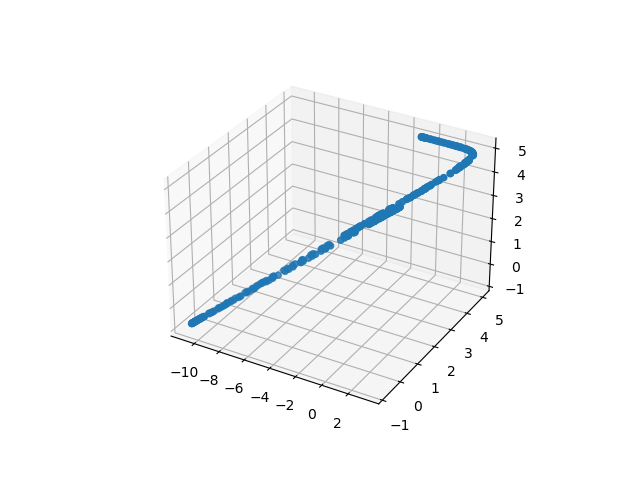

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack the trajectory data (assuming the first row is x, second is y, third is z)
x, y, z = orbit.T


# Plot the trajectory
ax.scatter(x, y, z, label='Orbital trajectory')
plt.show()

In [118]:
# Function to detect period
def detect_period(orbit, tolerance=1e-3):
    # Loop through the orbit and find repeating patterns
    for period in range(1, 5):
        if np.allclose(orbit[-period:], orbit[-2*period:-period], atol=tolerance):
            return period
    return np.inf  # Return infinity if no period is found


def find_p(params1, params2,W,B):
    periods = np.zeros((resolution, resolution))

    for i, p1 in tqdm(enumerate(params1)):
        for j, p2 in enumerate(params2):
            w = W(p1, p2)
            b = B(p1, p2)
            periods[i, j] = detect_period(neuron_orbiter(x0,w,b,200,100))
            
    return periods

In [127]:
N = 2
it = 1000
v=5
resolution = 100
paramspace = np.array([[-2,10],[-2,10]])
p_value_storage = np.zeros((5, resolution, resolution))
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[0],resolution)

In [146]:
w11,w12,w13 = -16, 4,4
w21 = w31= -6
x0 = np.array([-1,1,1])*0
W = lambda p1,p2: np.array([[w11,w12,w13],
              [w21,0,0],
              [w31,0,0]])
b0 = -3.3
b = lambda p1,p2: np.array([b0,p1,p2])

In [162]:
slices = {}
b0range = np.linspace(-3,-4,10)
for b0 in b0range:
    slices[f"b_{b0}"] = find_p(params1, params2, W,b)


100it [00:13,  7.68it/s]
100it [00:12,  8.22it/s]
100it [00:12,  8.11it/s]
100it [00:12,  8.25it/s]
100it [00:12,  8.27it/s]
100it [00:12,  8.23it/s]
100it [00:12,  8.00it/s]
100it [00:12,  7.89it/s]
100it [00:12,  7.89it/s]
100it [00:12,  7.86it/s]


In [163]:
np.savez("data/figure10slices.npz", **slices)

In [164]:
data = np.load("data/figure10slices.npz")


In [165]:
data

NpzFile 'data/figure10slices.npz' with keys: b_-3.0, b_-3.111111111111111, b_-3.2222222222222223, b_-3.3333333333333335, b_-3.4444444444444446...

In [ ]:
# Load the existing .npz file
with np.load("data/figure10slices.npz") as data:
    # Extract all existing images
    images = {key: data[key] for key in data}

# Add the new image with a new key
next_index = len(images)  # This gives you the next available index
images[f'image_{next_index}'] = new_image

# Save all images back to the .npz file, including the new image
np.savez('images.npz', **images)

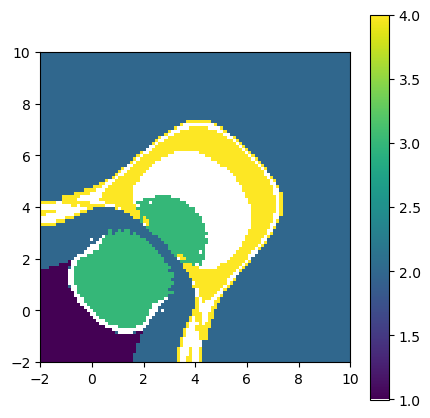

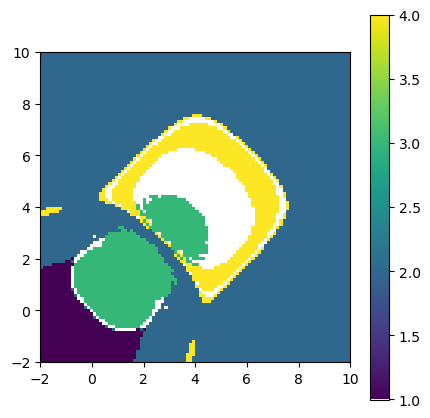

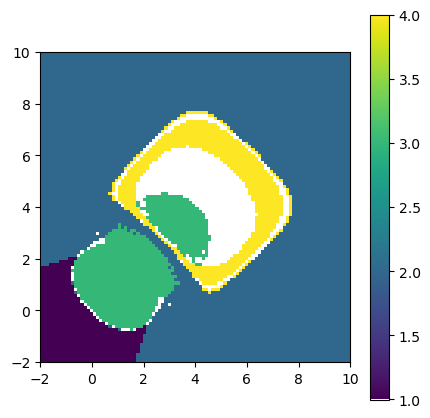

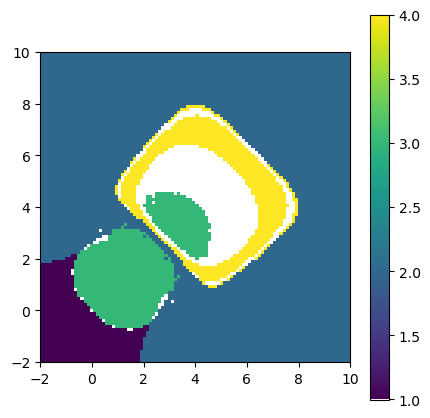

In [157]:
for key in slices:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.imshow(data[key],origin="lower",extent=paramspace.ravel())
    plt.colorbar()
    plt.show()